## 0. Set up preparation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

In [1]:
run_dir = './' # 변경
print(f'The current active folder is "{run_dir}".\n')

# module path
module_dir = run_dir + '/pytorch-pycm-template'

sys.path.append(module_dir)
print(sys.path[-1])

The current active folder is "/home/user/lab".

/home/user/lab/pytorch-pycm-template


## Run

In [6]:
from utils import Result_visualization

In [4]:
result = Result_visualization('/data/user/TNBC-performance/saved/0418', 'npz', 'TNR')

Category list : 4cnt -> ['Adam-lr_1e-05', 'Adam-lr_1e-05_CosineAnnealingWarmRestarts', 'Lion-lr_1e-05', 'Lion-lr_1e-05_CosineAnnealingWarmRestarts']
Model_list    : 7cnt -> ['convnextv2_atto', 'deit_small_patch16_ls', 'densenet121', 'hifuse_tiny', 'inceptionnext_tiny', 'restv2_tiny', 'vanillanet_5']
Run_list      : 4cnt -> ['16batchX4-500epoch-ce_loss', '16batchX4-500epoch-ce_loss-down_random_downsampling', '16batchX4-500epoch-ce_loss-CutMix', '16batchX4-500epoch-ce_loss-CutMix-down_random_downsampling']
example result file : {'0420_031645': {'train': PosixPath('/data/user/TNBC-performance/saved/0418/output/npz/Lion-lr_1e-05_CosineAnnealingWarmRestarts/vanillanet_5/16batchX4-500epoch-ce_loss-CutMix-down_random_downsampling-0420_031645/metrics.json'), 'test': OrderedDict([(484, PosixPath('/data/user/TNBC-performance/saved/0418/output/npz/Lion-lr_1e-05_CosineAnnealingWarmRestarts/vanillanet_5/16batchX4-500epoch-ce_loss-CutMix-down_random_downsampling-0420_031645/test/metrics-test-epoch48

In [8]:
result.df_dict.keys()

dict_keys(['training', 'validation', 'test', 'training_runtime'])

In [9]:
result.df_dict['training_runtime']

,model,runtime (mean),minutes (mean)
0,convnextv2_atto,00:30:43,30
1,deit_small_patch16_LS,03:15:12,195
2,DenseNet121,00:46:00,46
3,HiFuse_Tiny,02:43:53,163
4,inceptionnext_tiny,00:21:30,21
5,restv2_tiny,01:33:41,93
6,vanillanet_5,01:33:37,93


In [14]:
result.save2excel(save_name='0418-result')

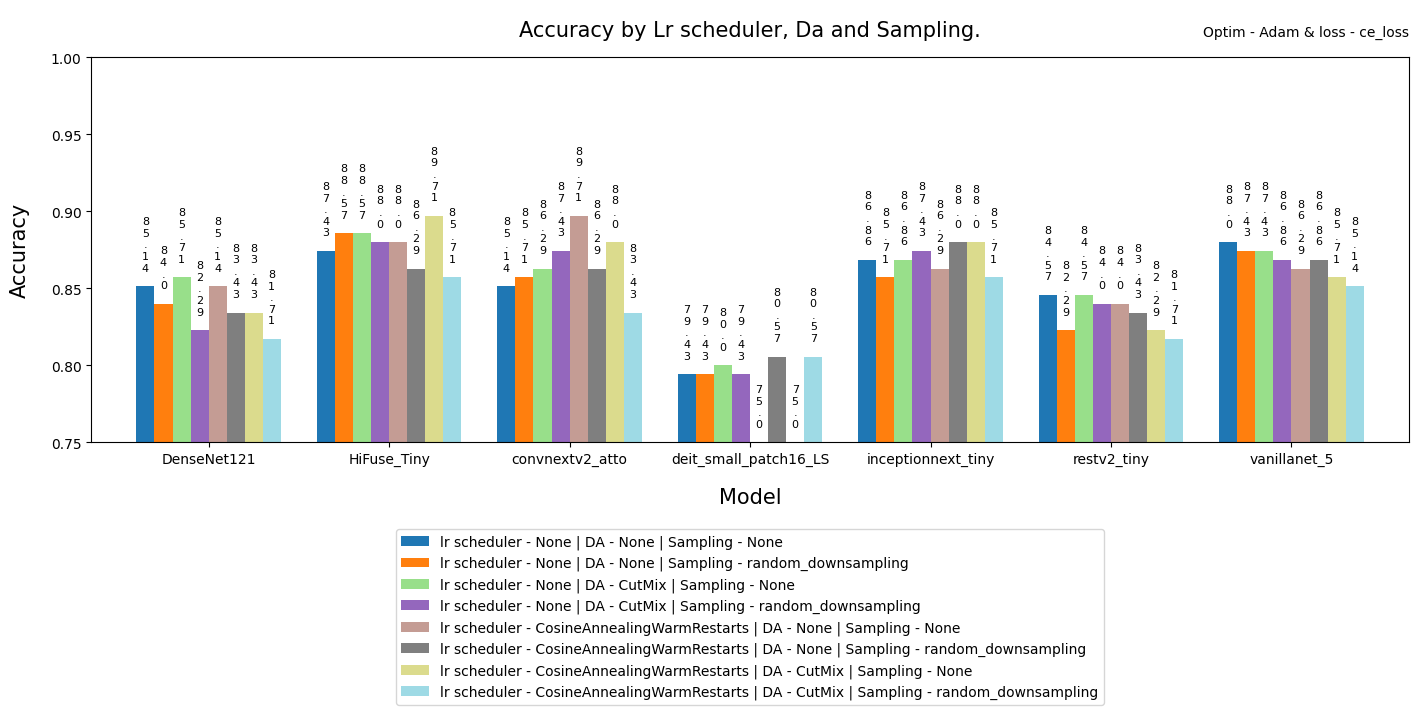

In [11]:
save_name = 'Accuracy'
result.save2bar_per_model(df=result.df_dict['test'], optimizer='Adam', loss='ce_loss', by_metric='ACC', by_metric_replace_str=save_name, save_name=save_name)

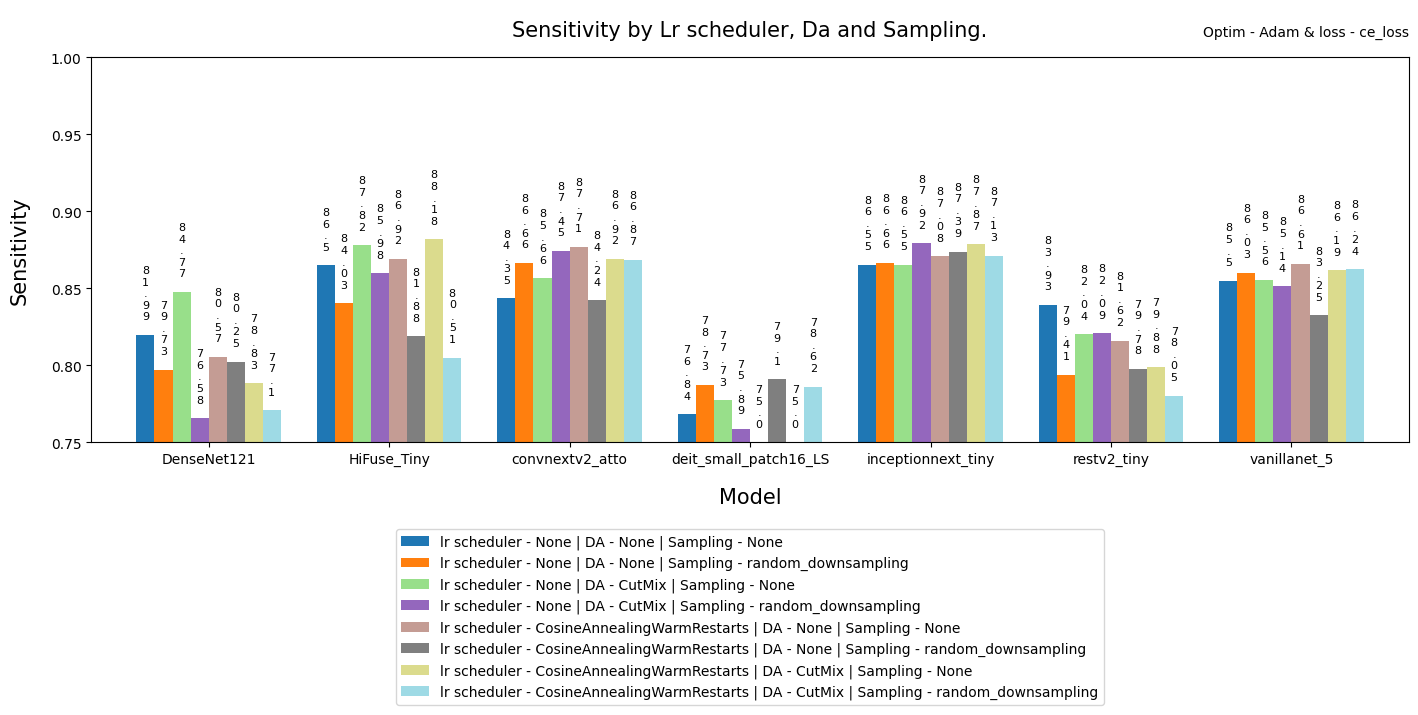

In [12]:
result._plot_close()
save_name = 'Sensitivity'
result.save2bar_per_model(df=result.df_dict['test'], optimizer='Adam', loss='ce_loss', by_metric='TPR', by_metric_replace_str=save_name, save_name=save_name)

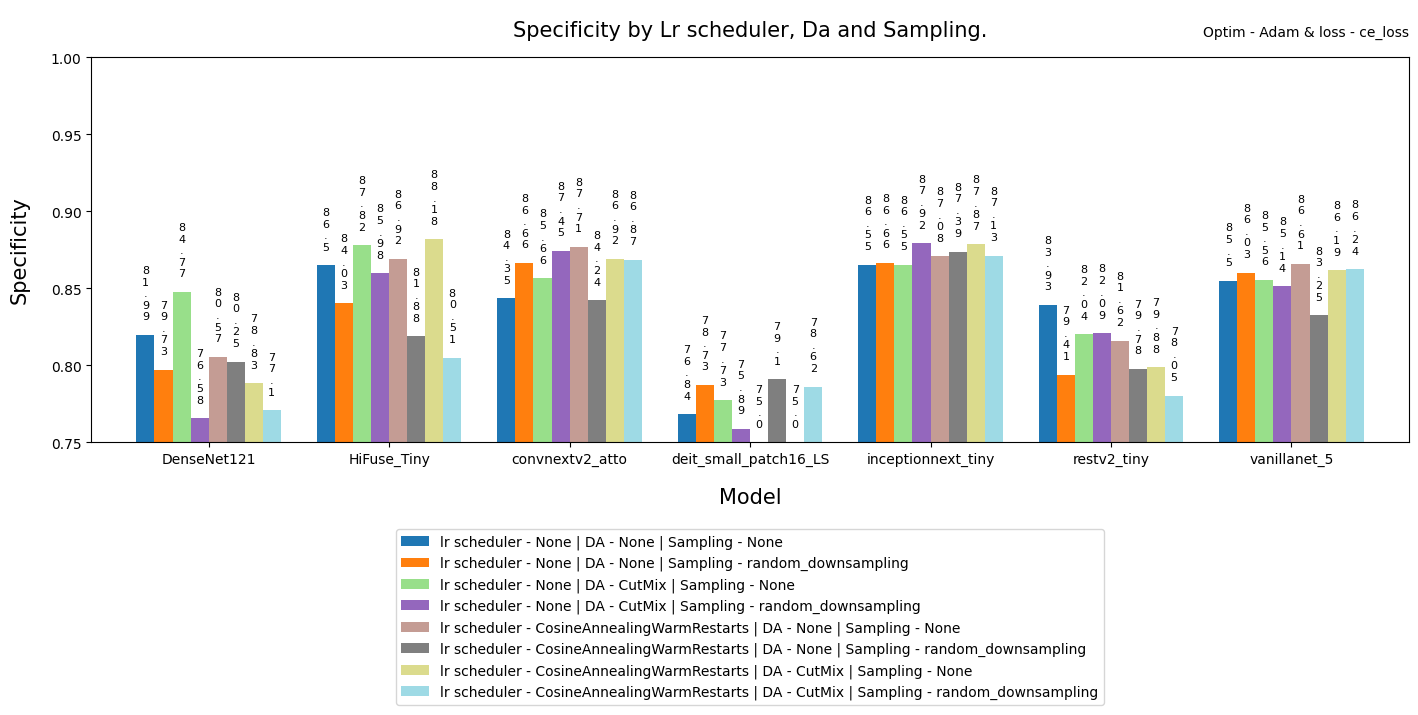

In [13]:
result._plot_close()
save_name = 'Specificity'
result.save2bar_per_model(df=result.df_dict['test'], optimizer='Adam', loss='ce_loss', by_metric='TNR', by_metric_replace_str=save_name, save_name=save_name)